In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import folium 

shape_file = gpd.read_file('/Users/enzowurtele/Desktop/DATABASES/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')

SuperStore_db = pd.read_csv('/Users/enzowurtele/Desktop/DATABASES/Sample-Superstore.csv', encoding='latin1')


In [3]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

In [4]:
shape_file.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.0577 44.99743, -104.05021 44.99..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [5]:
print(shape_file.columns)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [6]:
SuperStore_db.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [7]:
shape_file = shape_file.rename(columns={'NAME': 'State'})

merged_ShapeFile =  shape_file.merge(SuperStore_db, on='State', how='inner')

In [8]:
merged_ShapeFile.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,State,LSAD,ALAND,AWATER,geometry,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",22,CA-2016-137330,12/9/2016,12/13/2016,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.46,7,0.0,5.0596
1,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",23,CA-2016-137330,12/9/2016,12/13/2016,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,68025,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.34,7,0.0,15.6884
2,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",808,CA-2015-140921,2/3/2015,2/5/2015,First Class,AA-10375,Allen Armold,Consumer,United States,Omaha,68104,Central,FUR-FU-10003347,Furniture,Furnishings,Coloredge Poster Frame,28.40,2,0.0,11.0760
3,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",809,CA-2015-140921,2/3/2015,2/5/2015,First Class,AA-10375,Allen Armold,Consumer,United States,Omaha,68104,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,149.97,3,0.0,50.9898
4,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",1509,CA-2017-108294,12/10/2017,12/10/2017,Same Day,LS-16975,Lindsay Shagiari,Home Office,United States,Omaha,68104,Central,OFF-BI-10004965,Office Supplies,Binders,Ibico Covers for Plastic or Wire Binding Elements,34.50,3,0.0,15.5250


In [9]:
print(merged_ShapeFile.columns)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'State', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'Row ID', 'Order ID', 'Order Date',
       'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [10]:
SuperStore_db['Order Date'] = pd.to_datetime(SuperStore_db['Order Date'])

In [11]:
SuperStore_db['Month'] = SuperStore_db['Order Date'].dt.month

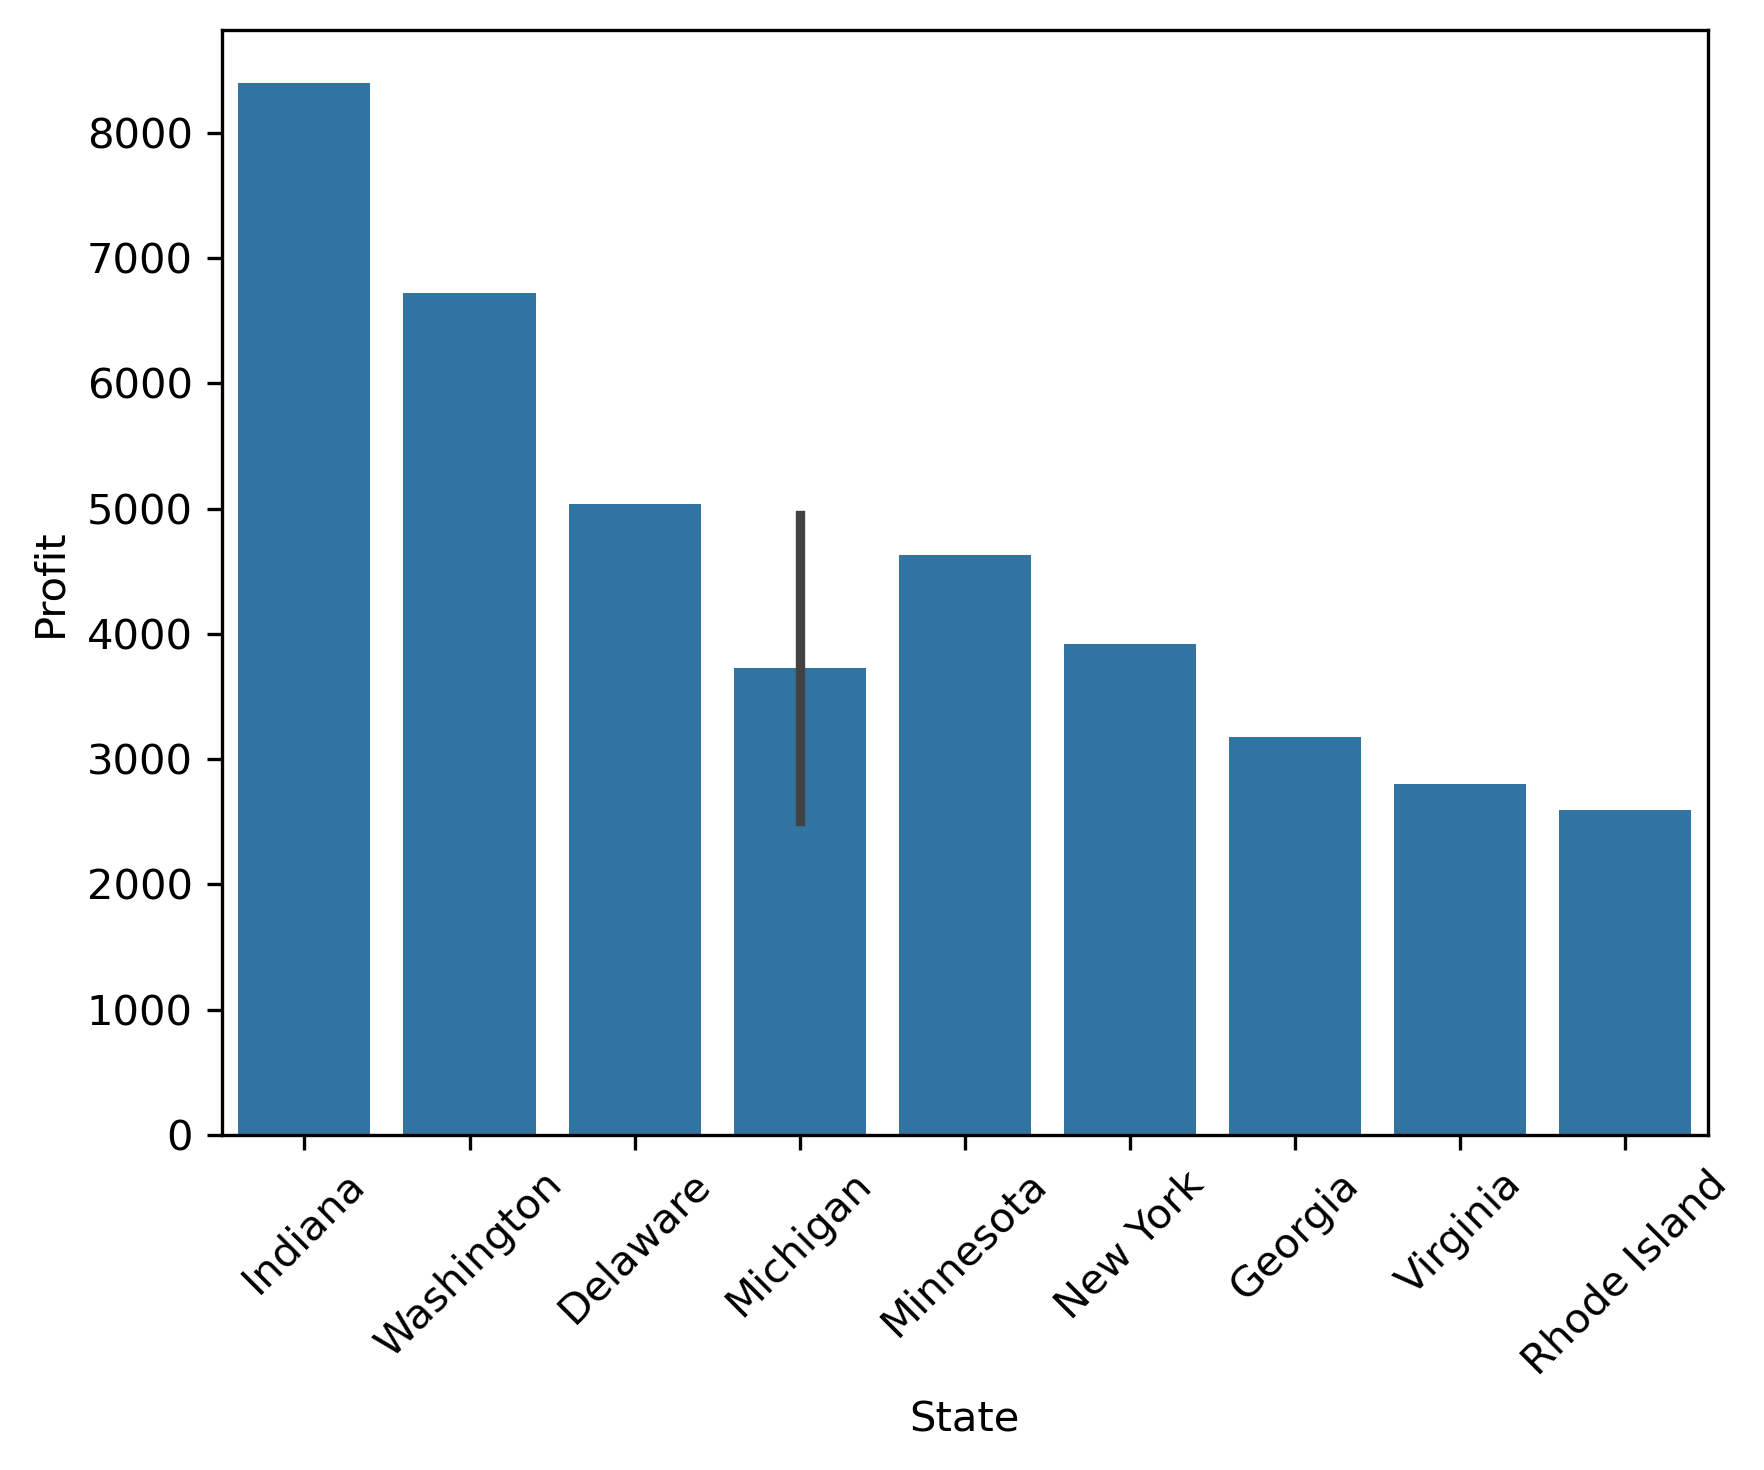

In [12]:
top_10_states = SuperStore_db.sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(6,5), dpi=300)
sns.barplot(data=top_10_states, x='State', y='Profit')
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='Category', ylabel='count'>

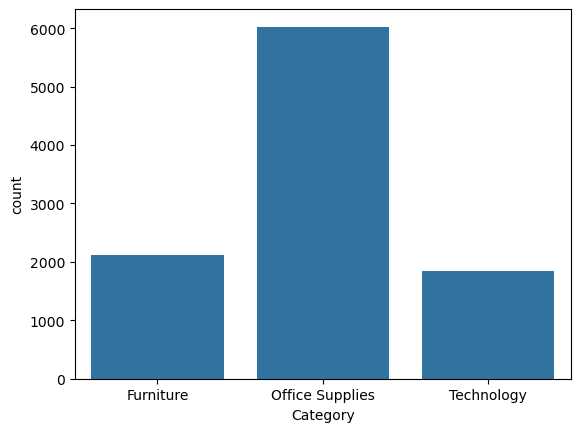

In [13]:
sns.countplot(data=SuperStore_db, x='Category')

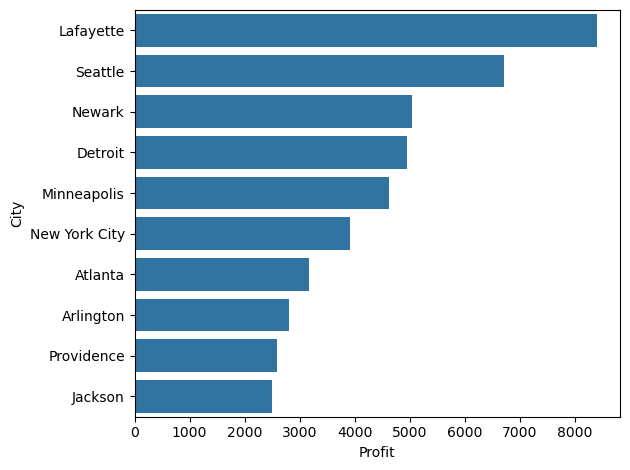

In [14]:
top_10_cities = SuperStore_db.sort_values(by='Profit', ascending=False).head(10)

sns.barplot(data=top_10_cities, x='Profit', y='City')
plt.tight_layout()


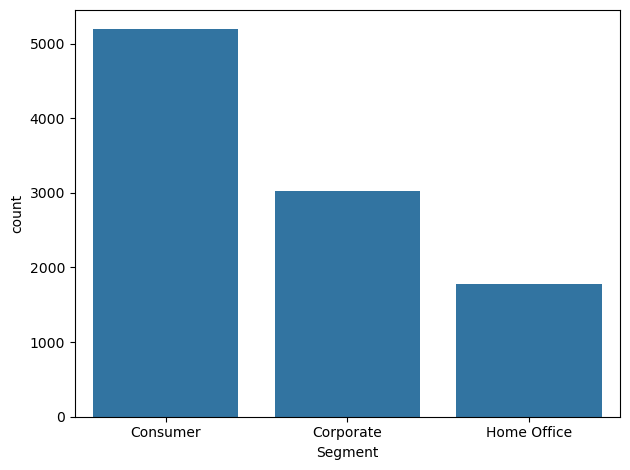

In [15]:
sns.countplot(data=SuperStore_db, x='Segment')
plt.tight_layout()

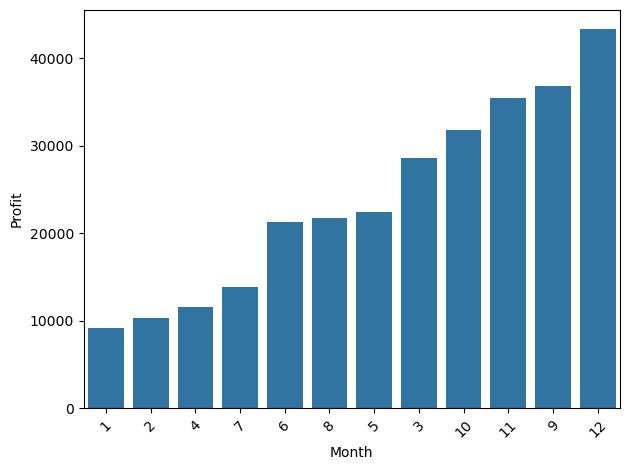

In [16]:
sorted_data = SuperStore_db.groupby('Month')['Profit'].sum().reset_index().sort_values(by='Profit')


sns.barplot(data=sorted_data, x='Month', y='Profit', order=sorted_data['Month'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
state_sales = SuperStore_db.groupby('State', as_index=False)['Sales'].sum()

In [18]:
import folium


m = folium.Map(location=[37.8, -96], zoom_start=4)  


folium.Choropleth(
    geo_data=shape_file,
    data=state_sales,
    columns=['State', 'Sales'],  
    key_on='feature.properties.State',  
    fill_color='YlGnBu',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Sales by State'
).add_to(m)

m

m.save("sales_map.html")


In [19]:
state_profit = SuperStore_db.groupby('State', as_index=False)['Profit'].sum()

In [20]:
import folium


m_01 = folium.Map(location=[37.8, -96], zoom_start=4)  


folium.Choropleth(
    geo_data=shape_file,
    data=state_profit,
    columns=['State', 'Profit'],  
    key_on='feature.properties.State',  
    fill_color='YlGnBu',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Profit by State'
).add_to(m_01)

m_01

m_01.save("profit_map.html")

In [21]:
state_discount = SuperStore_db.groupby('State', as_index=False)['Discount'].sum()

In [22]:
import folium


m_02 = folium.Map(location=[37.8, -96], zoom_start=4)  


folium.Choropleth(
    geo_data=shape_file,
    data=state_discount,
    columns=['State', 'Discount'],  
    key_on='feature.properties.State',  
    fill_color='YlGnBu',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total discount by State'
).add_to(m_02)

m_02

m_02.save("discount_map.html")

In [23]:
state_discount_10 = SuperStore_db.groupby('State', as_index=False)['Discount'].sum().head(10)

<Axes: xlabel='Discount', ylabel='State'>

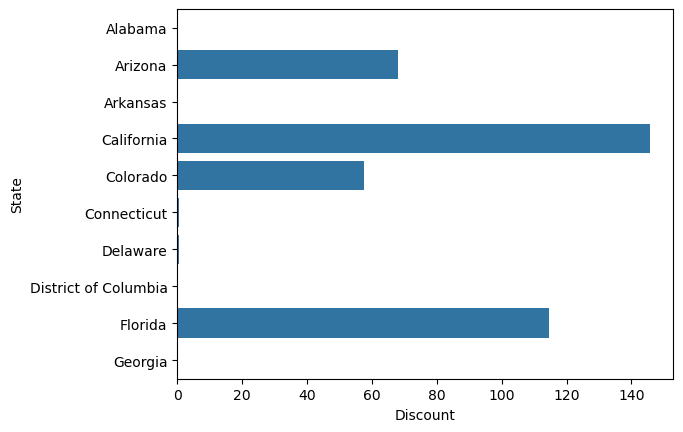

In [24]:
sns.barplot(data=state_discount_10, x='Discount', y='State')

In [25]:
calafornia_product_sales = SuperStore_db[SuperStore_db['State'] == 'California']
calafornia_product_sales = calafornia_product_sales.groupby('Category')[['Sales', 'Profit']].sum()

print(calafornia_product_sales)

                       Sales      Profit
Category                                
Furniture        156064.6015   9162.9656
Office Supplies  142351.9480  37748.3847
Technology       159271.0820  29470.0368


In [26]:
washington_product_sales = SuperStore_db[SuperStore_db['State'] == 'Washington']
washington_product_sales = washington_product_sales.groupby('Category')[['Sales', 'Profit']].sum()

print(washington_product_sales)

                     Sales      Profit
Category                              
Furniture        48020.152   7193.7850
Office Supplies  40084.408  11189.5232
Technology       50536.710  15019.3435


In [27]:
california_data = SuperStore_db[SuperStore_db['State'] == 'California']
washington_data = SuperStore_db[SuperStore_db['State'] == 'Washington'] 

In [28]:
california_subcategories = california_data.groupby('Sub-Category')[['Sales', 'Profit']].sum()
washington_subcategories = washington_data.groupby('Sub-Category')[['Sales', 'Profit']].sum()

print(california_subcategories)
print(washington_subcategories)


                   Sales      Profit
Sub-Category                        
Accessories   37255.0100  11095.6565
Appliances    24175.9200   6992.2318
Art            5495.6600   1614.8365
Binders       28473.1680  10002.1537
Bookcases     27558.5215   1418.9915
Chairs        63079.3680   2435.9715
Copiers       24559.5200   7889.8519
Envelopes      3237.3400   1529.4161
Fasteners       479.5300    195.7505
Furnishings   19996.4800   5611.5606
Labels         2899.1400   1370.1191
Machines      29492.0160   4175.4087
Paper         16757.9500   7977.5395
Phones        67964.5360   6309.1197
Storage       45112.2900   7204.1372
Supplies      15720.9500    862.2003
Tables        45430.2320   -303.5580
                  Sales     Profit
Sub-Category                      
Accessories   15119.160  4263.2736
Appliances     1969.350   591.8608
Art            1063.840   320.1679
Binders       18156.128  6061.8114
Bookcases      3144.460   570.0054
Chairs        16386.872   692.9453
Copiers       202

In [29]:
california_tables = california_data[california_data['Sub-Category'] == 'Tables']
print(california_tables['Discount'].mean())


0.19999999999999993


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

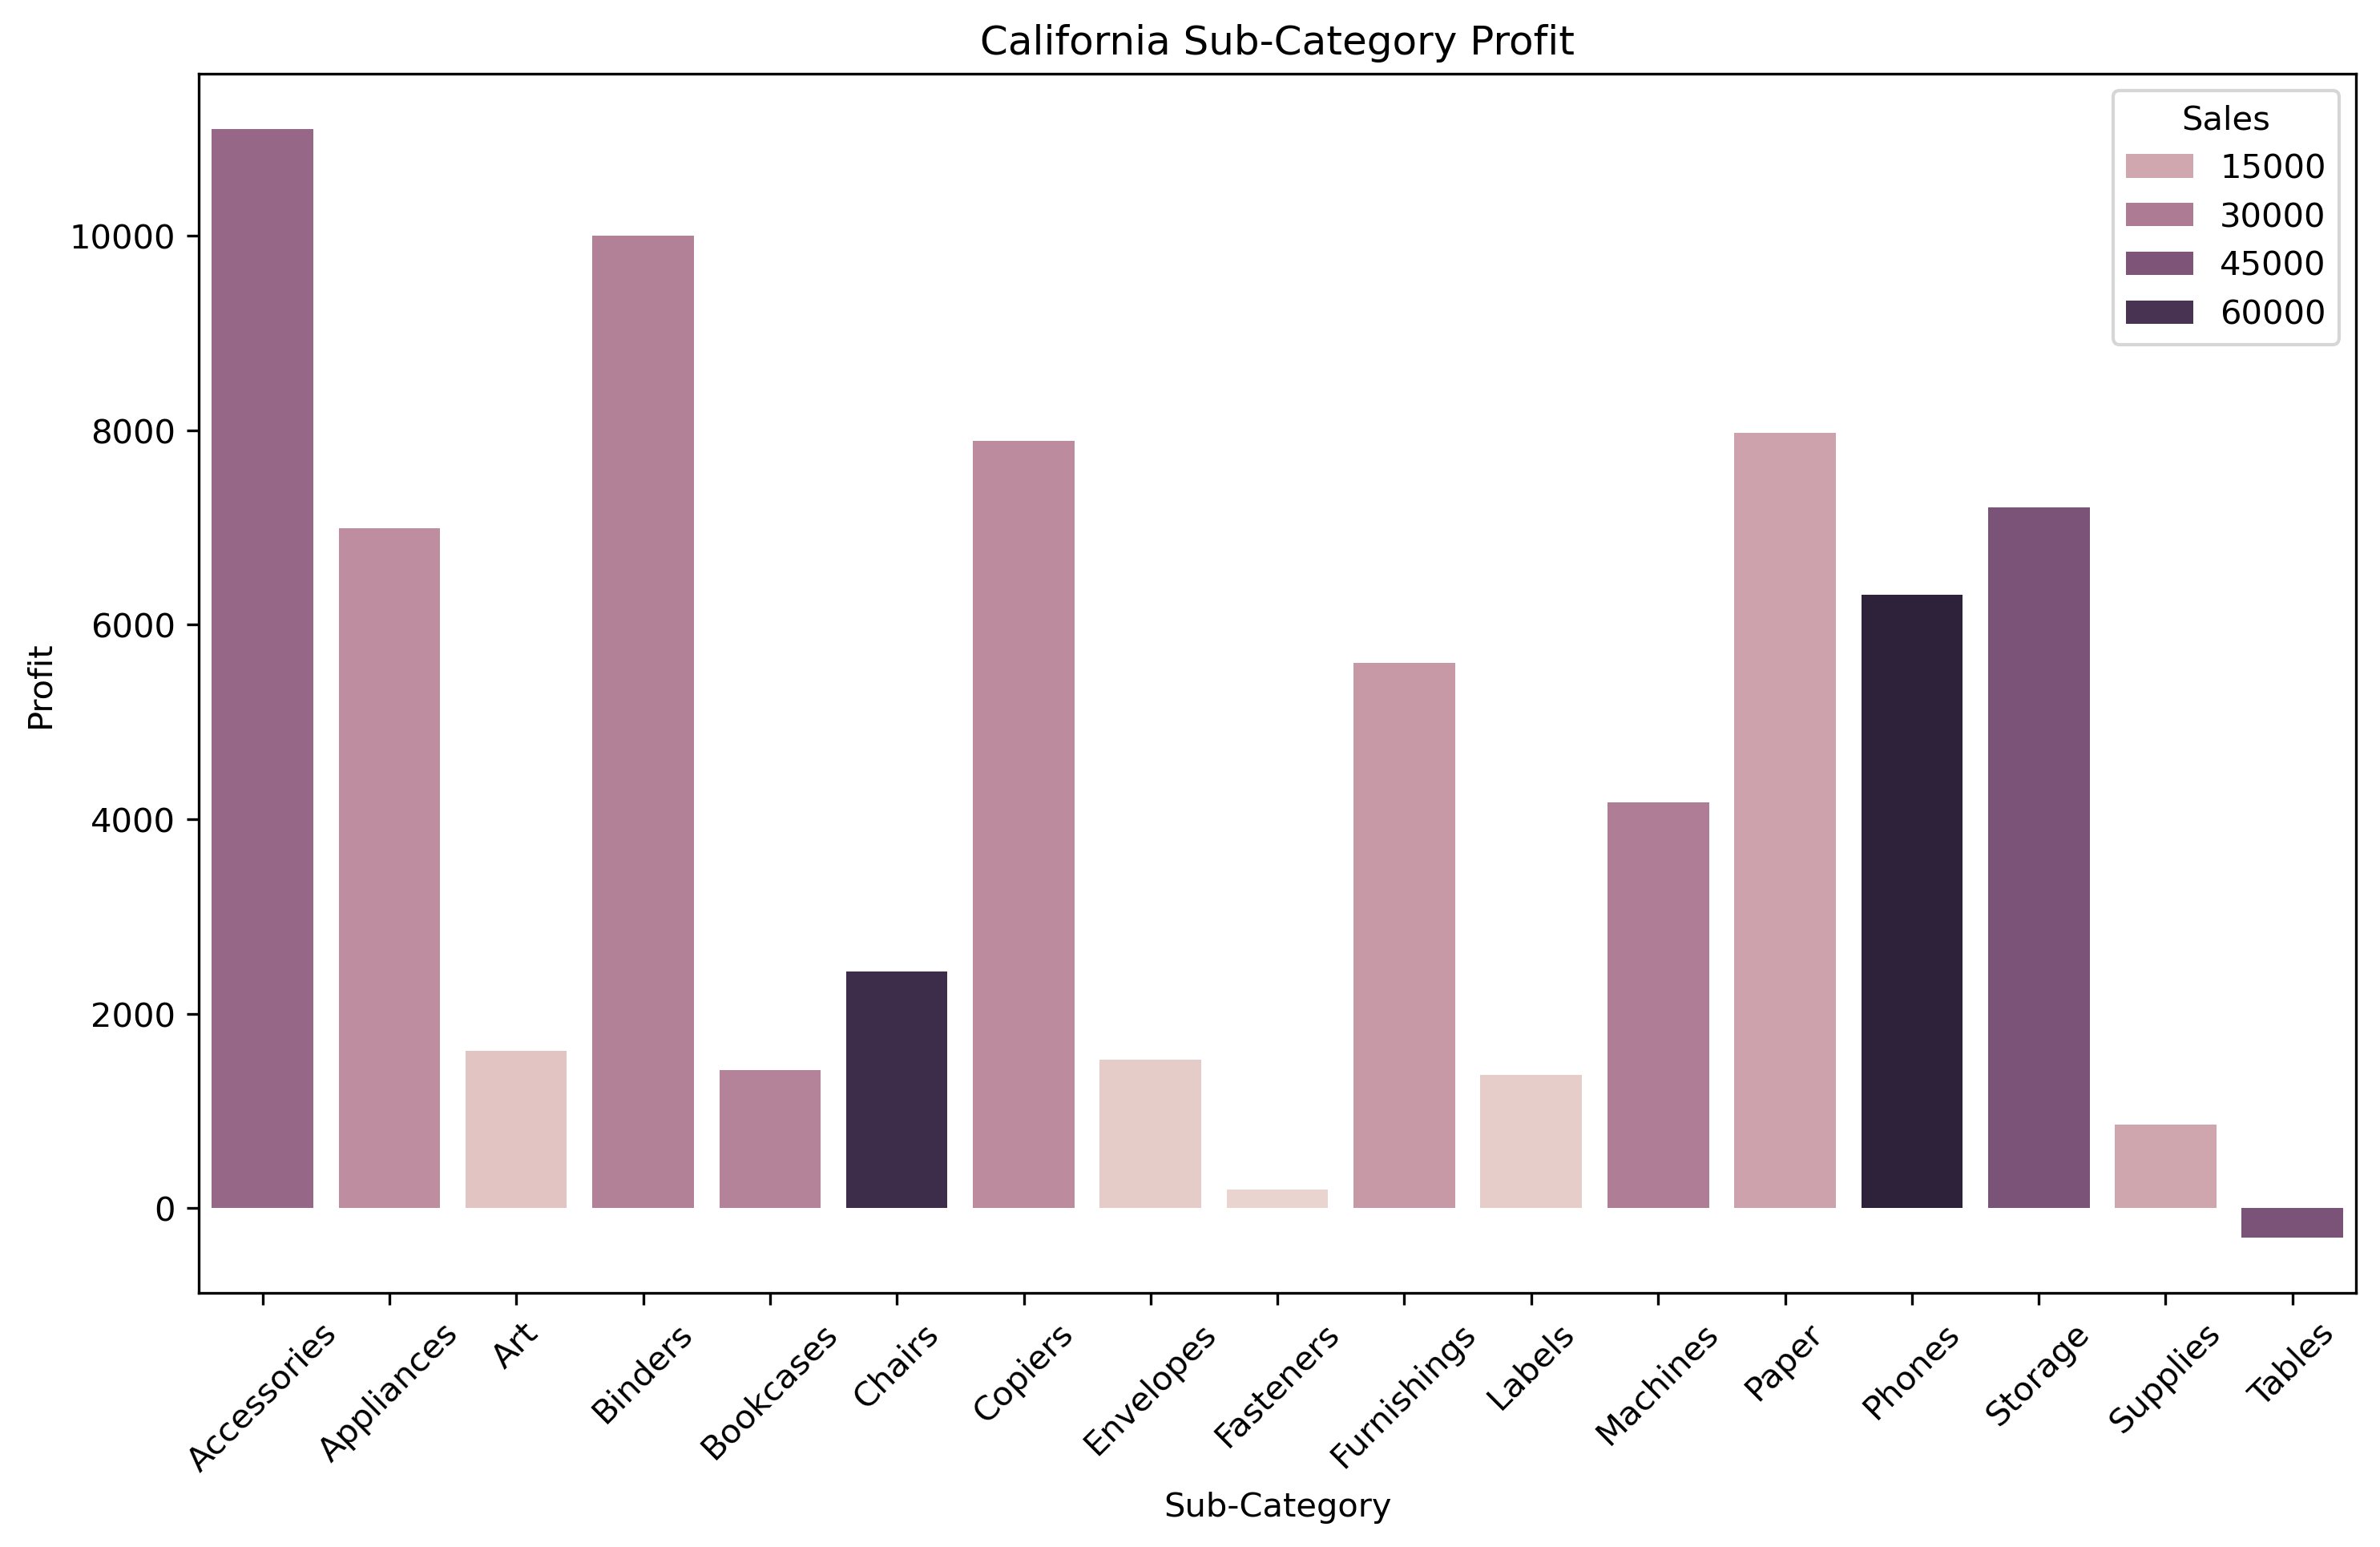

In [30]:
plt.figure(figsize=(10,6), dpi=300)
sns.barplot(data=california_subcategories, x='Sub-Category', y='Profit', hue='Sales')
plt.title('California Sub-Category Profit')
plt.tight_layout()
plt.xticks(rotation=45, ha='center')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

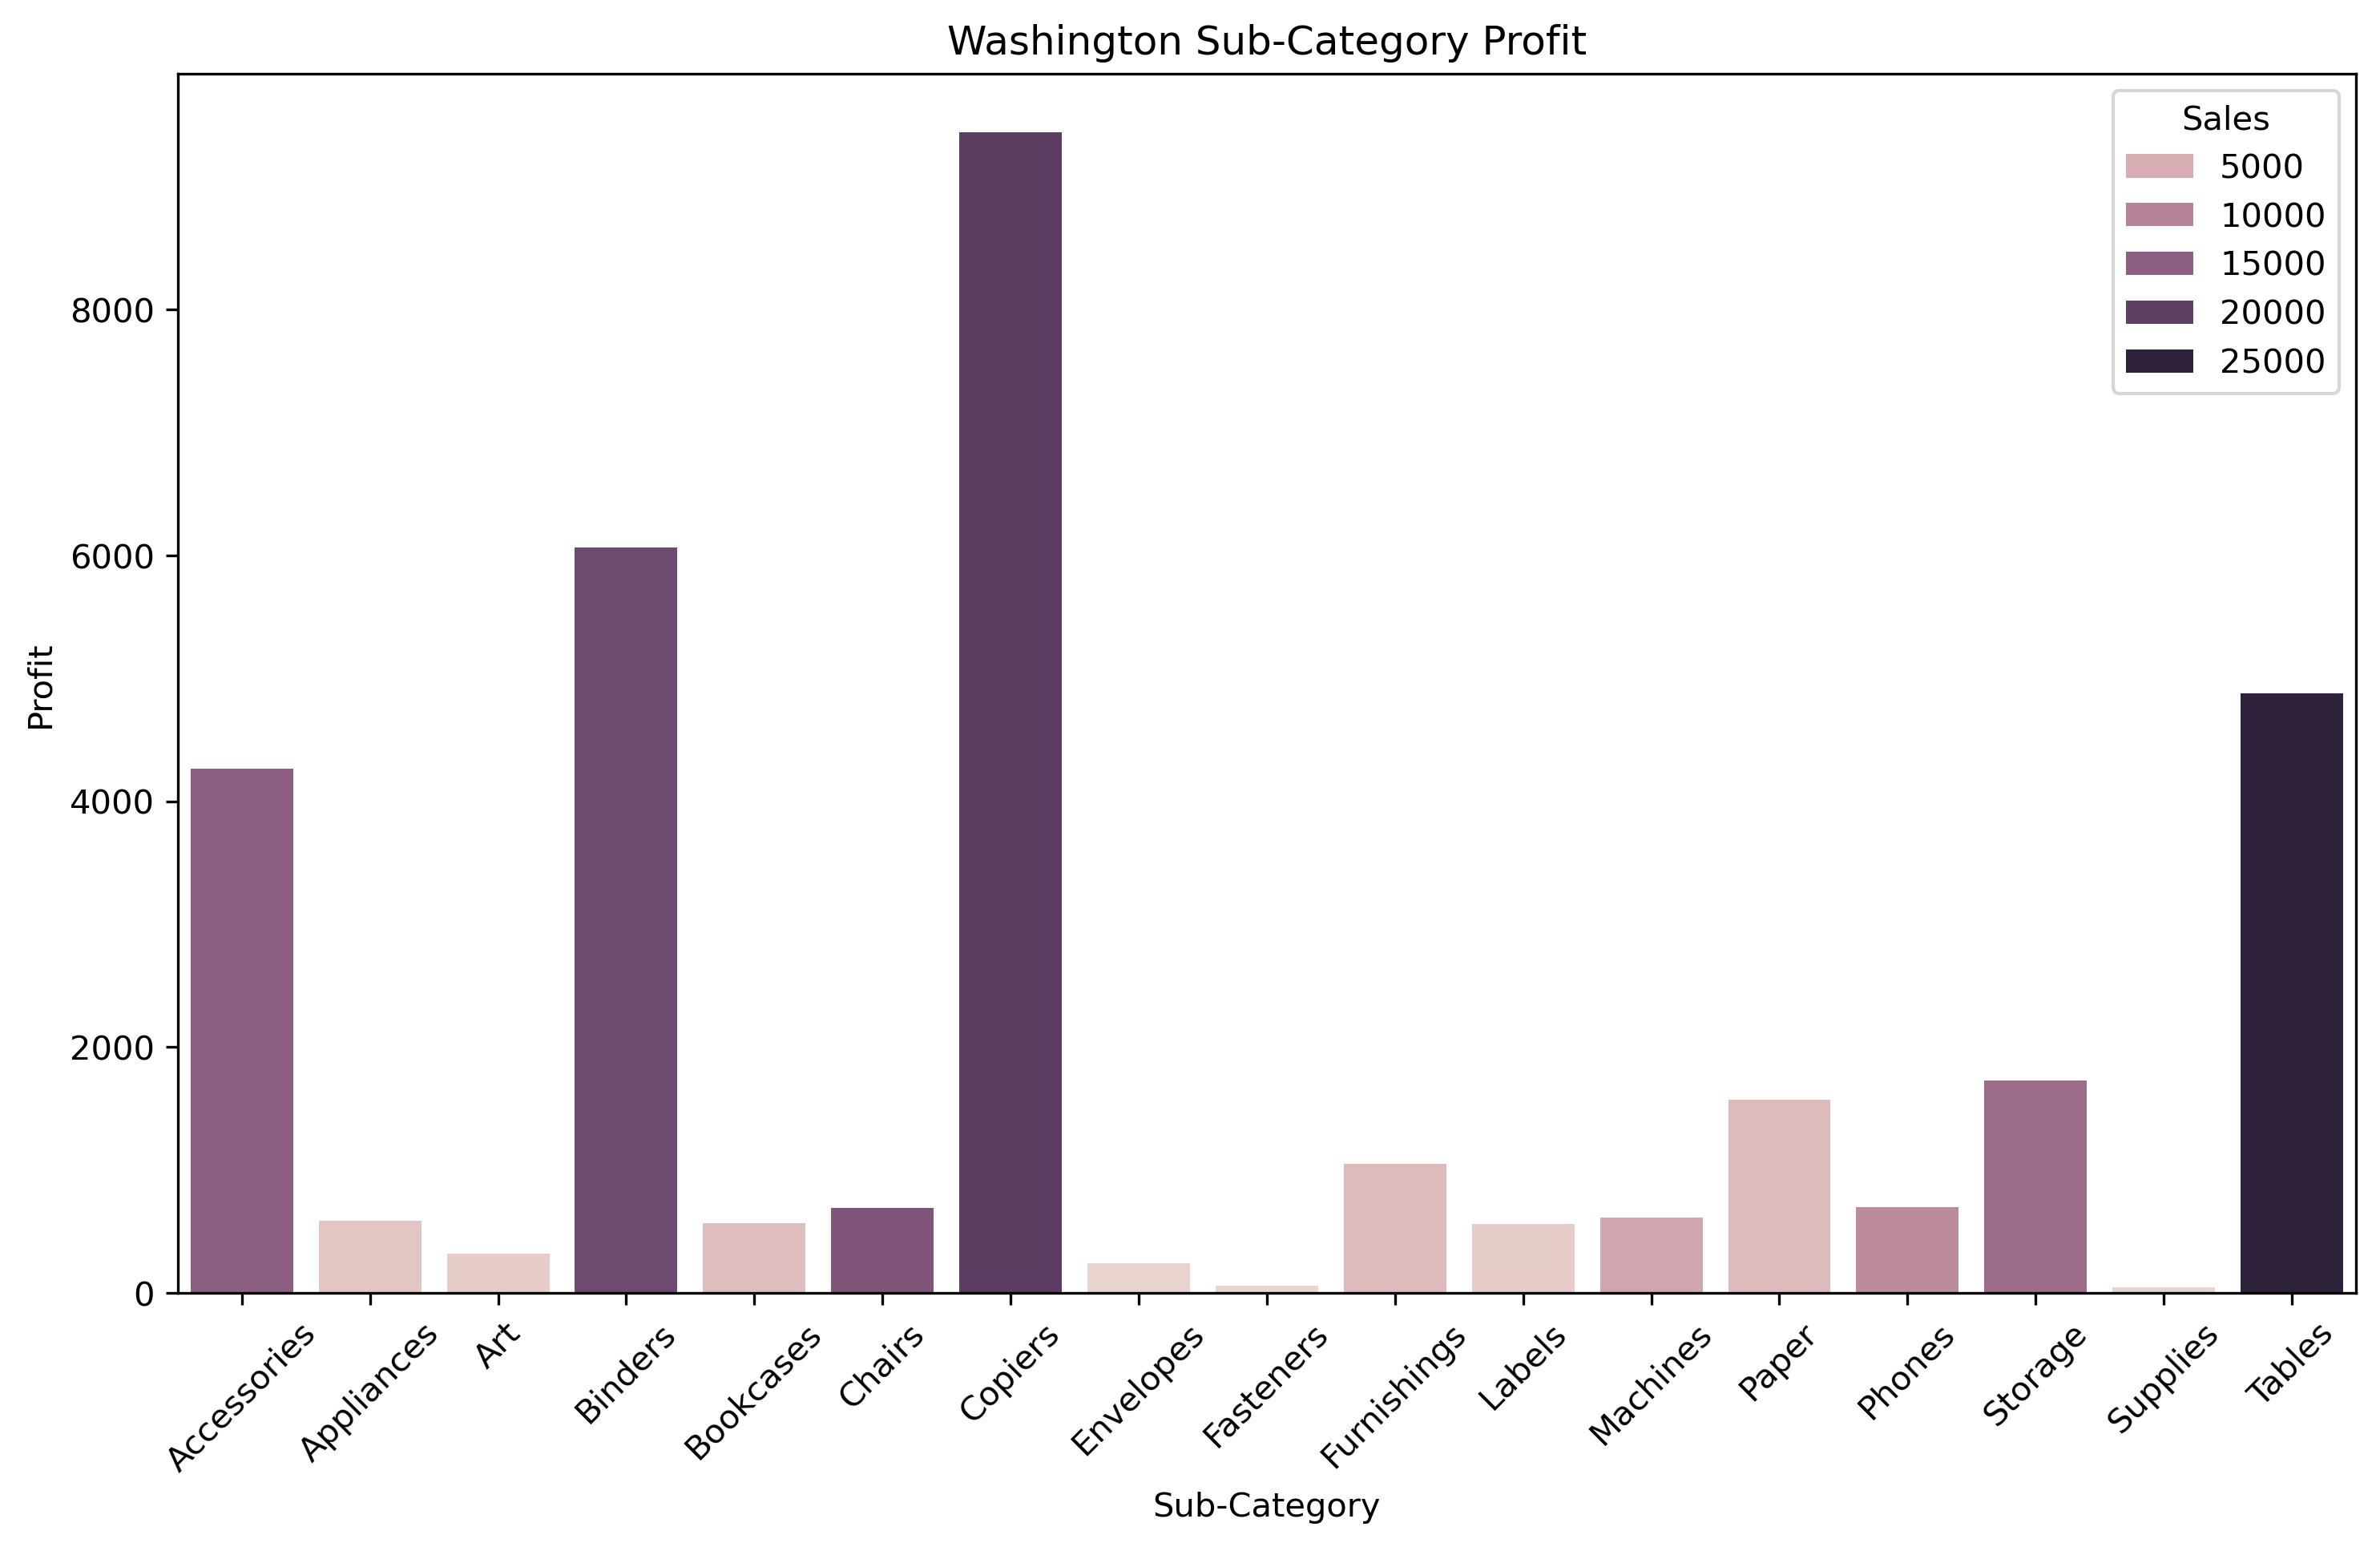

In [31]:
plt.figure(figsize=(10,6), dpi=300)
sns.barplot(data=washington_subcategories, x='Sub-Category', y='Profit', hue='Sales')
plt.title('Washington Sub-Category Profit')
plt.tight_layout()
plt.xticks(rotation=45, ha='center')